# 14wk-2: 클래스공부 4단계 – 파이썬의 비밀 (3)

최규빈  
2023-06-07

<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/03_Class/2023-06-07-14wk-2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-yZWViSW4CktNpOM7Km4BAe>

# imports

In [14]:
import numpy as np
import pandas as pd

# 클래스공부 4단계: 파이썬의 비밀 (3)

## 비밀12: `__iter__` ($\star\star\star\star\star$)

### ***for문의 복습***

`-` 아래와 같은 예제들을 관찰하여 for문을 복습하자.

(예제1) \[1,2,3,4\]

In [2]:
for i in [1,2,33,4]:
    print(i)

1
2
33
4

(예제2) (1,2,3,4)

In [3]:
for i in (1,2,33,4):
    print(i)

1
2
33
4

(예제3) ‘1234’

In [4]:
for i in '123asdf':
    print(i)

1
2
3
a
s
d
f

(예제4) 5

In [7]:
for i in 5:
    print(i)

`-` 의문1:

``` python
for i in ???:
    print(i)
```

에서 ??? 자리에 올수 있는 것이 무엇일까?

(예제5) \[\[1,2,3,4\],\[3,4,5,6\]\],
pd.DataFrame(\[\[1,2,3,4\],\[3,4,5,6\]\])

In [9]:
lst = [[1,2,3,4],[3,4,5,6]]
lst

In [22]:
for l in lst:
    print(l)

[1, 2, 3, 4]
[3, 4, 5, 6]

In [23]:
for l in np.array(lst):
    print(l)

[1 2 3 4]
[3 4 5 6]

In [24]:
for l in pd.DataFrame(lst):
    print(l)

0
1
2
3

`-` 데이터프레임인 경우는 colname이 반복

In [25]:
df = pd.DataFrame({'x':[1,2,3],'y':[2,3,4]})
df

In [26]:
for d in df:
    print(d)

x
y

`-` 의문2: for의 출력결과는 어떻게 예측할 수 있을까?

### ***for문의 동작원리***

`-` 의문1의 해결: 아래의 ??? 자리에 올 수 있는 것은 dir()하여
`__iter__`가 있는 object이다.

``` python
for i in ???:
    print(i)
```

이러한 오브젝트를 iterable object라고 한다.

`-` 예제1~4 확인

In [34]:
lst = [1,2,3]
set(dir(lst)) & {'__iter__'}

In [35]:
tpl = 1,2,3
set(dir(tpl)) & {'__iter__'}

In [36]:
string = '123'
set(dir(string)) & {'__iter__'}

In [37]:
a = 5
set(dir(a)) & {'__iter__'}

`-` `__iter__`의 역할: iterable object를 iterator로 만들 수 있다!

In [68]:
lst = [1,22,-33]

In [69]:
lst_iterator = lst.__iter__() 
# lst_iterator = iter(lst)

`-` iterator가 되면 무엇이 좋은가? -\> 숨겨진 기능 `__next__`가 열린다.

In [70]:
set(dir(lst_iterator)) & {'__next__'}

`-` 그래서 `__next__`의 기능은? -\> 원소를 차례대로 꺼내준다 + 더 이상
꺼낼 원소가 없으면 StopIteration Error를 발생시킨다.

In [71]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

In [72]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

In [73]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

In [74]:
next(lst_iterator)
# lst_iterator.__next__() # 같은코드

`-` for문의 동작원리

``` python
for i in iterable:
    ...
```

1.  이터레이터생성: `.__iter__()` 혹은 `iter()`을 이용하여 iterable을
    iterator로 만든다.

2.  $i$생성 및 반복: 1에서 만들어진 iterator에서 `.__next__()`함수를
    호출하고 결과를 $i$에 저장한뒤 for문 블락안의 내용 (들여쓰기 된
    내용) 을 실행한다. $\to$ 반복한다.

3.  정지: `.__next__()`함수를 호출할때 StopIteration Error가 나오면
    for문을 멈춘다.

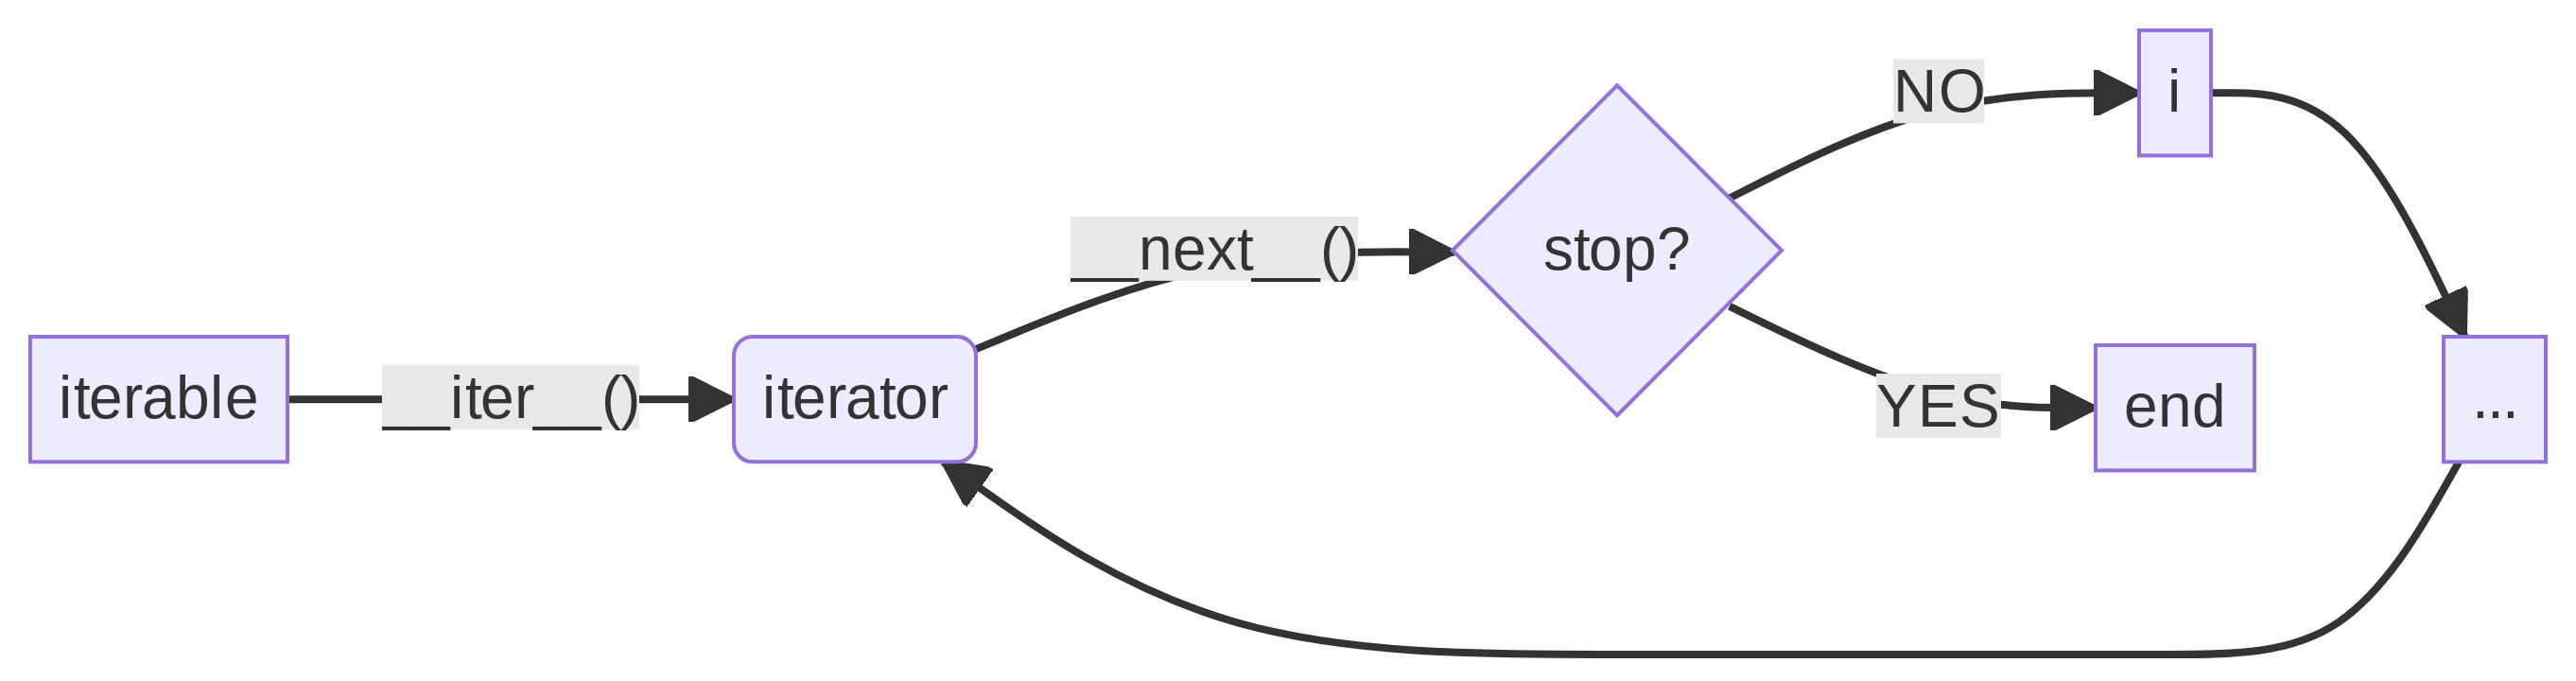

`-` 아래의 구조도 잘 돌아갈까?

``` python
for i in iterator:
    print(i)
```

> iterator의 iter가 자기자신을 리턴하도록 하는 트릭을 쓰면
> “1.이터레이터생성 2.$i$생성 및 반복 3.정지”의 동작원리를 수정하지 않고
> for문을 안전하게 돌릴 수 있다.

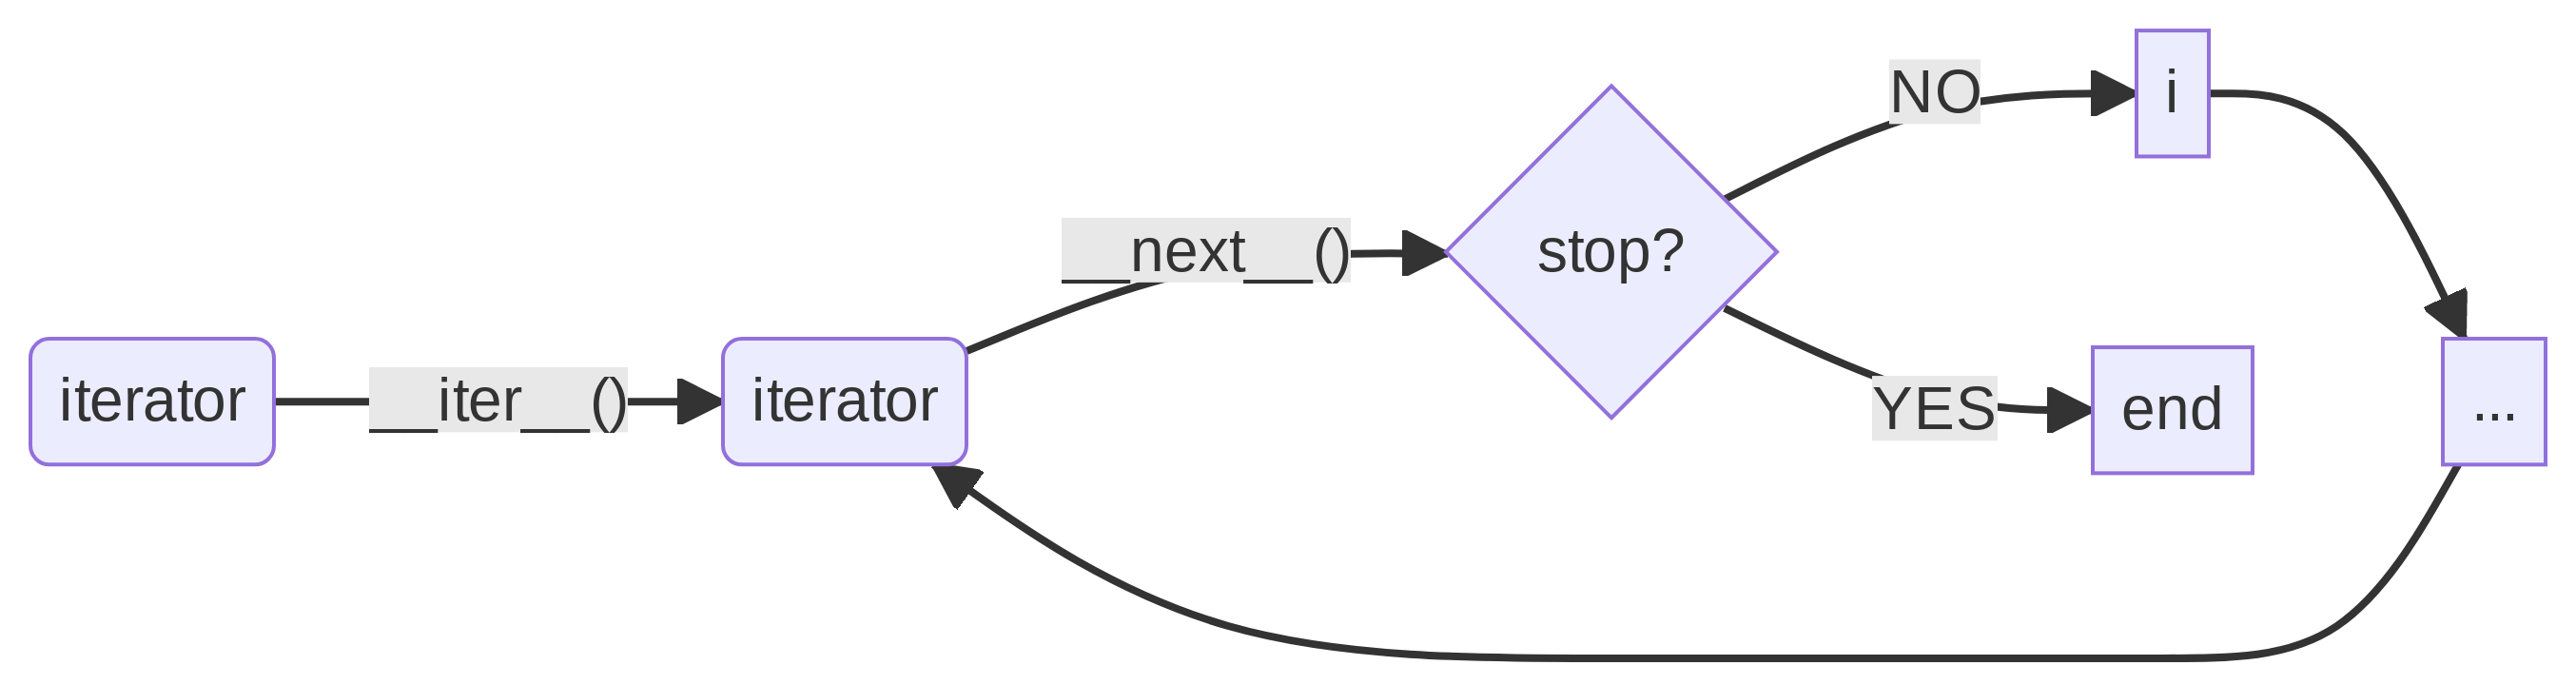

`-` 요약

-   iterable object는 숨겨진 기능으로 `__iter__`를 가진다.
-   iterator는 숨겨진 기능으로 `__iter__`와 `__next__`를 가진다. 따라서
    정의상 iterator는 그 자체로 iterable object가 된다!
-   iterator의 `__iter__`는 자기자신을 리턴한다.

`-` 의문2의 해결: for의 출력결과는 어떻게 예측할 수 있을까? iterator를
만들어서 `.__next__()`의 출력값을 확인하면 알 수 있다.

In [81]:
_df_itertor = iter(df)

In [82]:
next(_df_itertor)

In [83]:
next(_df_itertor)

In [84]:
next(_df_itertor)

### ***사용자정의 이터레이터***

`-` 내가 이터레이터를 만들어보자.

`-` 찌를 내는 순간 for문이 멈추도록 하는 이터레이터를 만들자.

In [86]:
class RPS_ITERATOR: # 찌를 내는순간 for문이 멈추도록 하는 이터레이터를 만들자
    def __init__(self): 
        self.candidate = ["묵","찌","빠"] 
    def __iter__(self):
        return self 
    def __next__(self):
        action = np.random.choice(self.candidate)
        if action == "찌":
            print("찌가 나와서 for문을 멈춥니다")
            raise StopIteration
        else:
            return action

In [87]:
a = RPS_ITERATOR()

In [89]:
a.__next__()

In [90]:
a.__next__()

In [91]:
a.__next__()

In [92]:
a.__next__()

찌가 나와서 for문을 멈춥니다

In [94]:
for i in a:
    print(i)

빠
묵
묵
빠
빠
찌가 나와서 for문을 멈춥니다

### ***range()***

`-` 파이썬에서 for문을 처음 배울 때: range(5)를 써라!

In [95]:
for i in range(5):
    print(i)

0
1
2
3
4

-   range(5)가 도데체 무엇이길래?

`-` `range(5)`의 정체는 그냥 iterable object이다.

In [101]:
set(dir(range(5))) & {'__iter__','__next__'}

`-` 그래서 언제든지 iterator로 바꿀 수 있다.

In [102]:
rtor= iter(range(5))
rtor

In [103]:
set(dir(rtor)) &  {'__iter__','__next__'}

`-` for문에서 range(5)가 행동하는 방법?

In [104]:
rtor = iter(range(5))

In [105]:
rtor.__next__()

In [106]:
rtor.__next__()

In [107]:
rtor.__next__()

In [108]:
rtor.__next__()

In [109]:
rtor.__next__()

In [110]:
rtor.__next__()

### ***zip***

`-` 이터레이터의 개념을 알면 for문에 대한 이해도가 대폭 상승한다.

In [114]:
for i,j in zip([1,2,3],'abc'):
    print(i,j)

1 a
2 b
3 c

-   zip은 뭐지?

In [115]:
zip([1,2,3],'abc')

`-` 어차피 `for i in ????`: 의 ???? 자리는 iterable object의 자리이다.

In [116]:
set(dir(zip([1,2,3],'abc'))) & {'__iter__','__next__'}

-   `__next__()`함수가 있음 $\to$ `zip([1,2,3],'abc')`은 그자체로
    iterator 였다!

In [117]:
z= zip([1,2,3],'abc')

In [118]:
z.__next__()

In [119]:
z.__next__()

In [120]:
z.__next__()

In [121]:
z.__next__()

***또다른 이해: 그러고보니까 `zip([1,2,3],'abc')`은 뭐하는 문법이지?***

In [489]:
zip?

-   너 클래스였어?

In [124]:
iterator_from_zip = zip.__call__([1,2,3],'abc')

In [125]:
for i,j in iterator_from_zip:
    print(i,j)

1 a
2 b
3 c

> 파이썬의 작은 비밀: zip은 iterator를 찍어내는 클래스이다.

### ***enumerate***

`-` zip의 짝궁으로 enumerate가 있음

In [129]:
for i,s in enumerate('abc'):
    print(i,s)

0 a
1 b
2 c

`-` `enumerate('abc')`도 문법상 iterable object 아니면 iterator 임.

In [130]:
set(dir(enumerate('abc'))) & {'__iter__', '__next__'}

-   iterator 였군

In [131]:
iterator = enumerate('abc')

In [132]:
next(iterator)

In [133]:
next(iterator)

In [134]:
next(iterator)

In [135]:
next(iterator)

`-` 참고: enumerate 는 클래스임

In [136]:
enumerate?

> 파이썬의 작은 비밀: enumerate 역시 iterator를 찍어내는 클래스다.

> 파이썬의 비밀12: iterator나 iterable object만 for문과 함께 사용할 수
> 있다.

## 비밀을 알아서 좋은점

### ***파이썬의 에러메시지 이해***

`TypeError`: 타입이 맞지 않는 연산을 수행하려고 할 때 발생. 예를 들어,
숫자와 문자열을 더하려고 할 때 발생.

In [25]:
result = 10 + "20"  # TypeError: unsupported operand type(s) for +: 'int' and 'str'

`SyntaxError`: 코드의 구문이 잘못되었을 때 발생. 주로 오타, 괄호 불일치,
콜론(:) 빠뜨림 등의 문제로 인해 발생.

In [23]:
if x == 5
    print("x is equal to 5")  # SyntaxError: invalid syntax

`NameError`: 정의되지 않은 변수나 함수를 사용하려고 할 때 발생.

In [24]:
print(unknown_variable)  # NameError: name 'unknown_variable' is not defined

`ValueError`: 함수나 메서드에 전달되는 인자의 값이 올바르지 않을 때
발생.

In [31]:
int_value = int("abc")  # ValueError: invalid literal for int() with base 10: 'abc'

`AttributeError`: 객체가 속성(attribute)이나 메서드(method)를 가지고
있지 않을 때 발생

In [32]:
my_list = [1, 2, 3]
my_list.append(4)
my_list.upper()  # AttributeError: 'list' object has no attribute 'upper'

`ImportError`: 모듈을 임포트하는 과정에서 문제가 발생할 때 발생.
임포트하려는 모듈이 존재하지 않거나, 임포트 경로 설정이 잘못된 경우에
해당.

In [33]:
import non_existent_module  # ImportError: No module named 'non_existent_module'

`IOError`: 파일 입출력 작업 중에 발생하는 에러. 파일이 존재하지 않거나,
파일에 쓰기 권한이 없는 경우 등에 해당.

In [34]:
file = open('file.txt', 'r')  # IOError: [Errno 2] No such file or directory: 'file.txt'

`KeyboardInterrupt`: 사용자가 프로그램의 실행을 중단할 때 발생.

In [137]:
while True:
    pass  # 무한 루프
# KeyboardInterrupt: 


`IndexError`: 유효하지 않은 인덱스를 사용하여 시퀀스(리스트, 튜플,
문자열 등)의 요소에 접근하려고 할 때 발생.

In [27]:
my_list = [1, 2, 3]
print(my_list[5])  # IndexError: list index out of range

`KeyError`: 딕셔너리에서 존재하지 않는 키를 사용하여 요소에 접근하려고
할 때 발생.

In [28]:
my_dict = {'name': 'John', 'age': 25}
print(my_dict['address'])  # KeyError: 'address'

`FileNotFoundError`: 존재하지 않는 파일을 열려고 할 때 발생.

In [29]:
file = open('nonexistent_file.txt')  # FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

`ZeroDivisionError`: 0으로 나누기 연산을 수행하려고 할 때 발생.

In [30]:
result = 10 / 0  # ZeroDivisionError: division by zero

### ***`TypeError`에 대한 심층분석***

`-` `.__add__` 가 올바르게 정의되지 않아서 생기는 경우

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    Cell In[37], line 1
    ----> 1 boram + '등록'+ '휴학' + '등록' + '휴학'

    TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

`-` `.__getitem__`이 정의되지 않은 오브젝트에서 인덱싱을 시도할때 생기는
오류

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    Cell In[57], line 1
    ----> 1 a[0], a[1]

    TypeError: 'RPS' object is not subscriptable

`-` `.__setitem__`이 정의되지 않은 오브젝트에서 할당을 시도할때 생기는
오류

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    Cell In[77], line 1
    ----> 1 a[0] = '보' 

    TypeError: 'RPS_Ver2' object does not support item assignment

`-` `.__len__` 이 정의되지 않은 오브젝트에서 len을 이용할때 생기는 오류

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    Cell In[122], line 1
    ----> 1 len(a)

    TypeError: object of type 'RPS_Ver3' has no len()

`-` `.__call__`이 정의되지 않은 오브젝트를 함수처럼 이용하려 할때 생기는
오류

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    Cell In[402], line 1
    ----> 1 a()

    TypeError: 'Klass' object is not callable

`-` `.__iter__`가 정의되지 않은 오브젝트를 iterable 오브젝트처럼
사용하려 할때 생기는 오류

    ---------------------------------------------------------------------------
    TypeError                                 Traceback (most recent call last)
    Cell In[422], line 2
          1 a=5 
    ----> 2 for i in a:
          3     print(i) 

    TypeError: 'int' object is not iterable

# 숙제

`(1)` 아래의 코드를 관찰하라.

In [459]:
iterator = enumerate('abcf',1)

In [460]:
next(iterator)

In [461]:
next(iterator)

In [462]:
next(iterator)

In [463]:
next(iterator)

In [464]:
next(iterator)

이를 바탕으로 `enumerate('abcf',1)`의 기능을 유추해볼 것.

`(2)` enumrate를 이용하여 아래의 코드를 개선하여라.

In [465]:
lst = ['아이언맨','토르','헐크','블랙위도우','로키']
for i in range(len(lst)):
    print('{}: {}'.format(i+1,lst[i]))

1: 아이언맨
2: 토르
3: 헐크
4: 블랙위도우
5: 로키

`(3)` 앞면과 뒷면이 나올 확률이 각각 1/2인 동전을 생각하자. 하니와
규빈은 이 동전을 연속으로 던져서 아래와 같은 룰을 정하여 내기를 하였다.

-   동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (앞면,앞면) 이
    나오면 하니의 승리
-   동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,뒷면) 이
    나오면 규빈의 승리

예를들어 동전을 반복하여 던져 아래와 같이 나온다면 하니의 승리이다.

-   (앞면, 뒷면, 앞면, 뒷면, 앞면, 앞면)
-   (앞면, 뒷면, 앞면, 앞면)

동전을 반복하여 던져 아래와 같이 나온다면 규빈의 승리이다.

-   (앞면, 뒷면, 앞면, 뒷면, 뒷면)
-   (뒷면, 앞면, 뒷면, 뒷면)

이 내기는 하니가 유리한가? 규빈이 유리한가? 시뮬레이션을 통해 검증하라.

> **Note**
>
> **hint**: 당연히 5:5겠죠?

`(4)` 앞면과 뒷면이 나올 확률이 각각 1/2인 동전을 생각하자. 하니와
규빈은 이 동전을 연속으로 던져서 아래와 같은 룰을 정하여 내기를 하였다.

-   동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,앞면) 이
    나오면 하니의 승리
-   동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,뒷면) 이
    나오면 규빈의 승리

이 내기는 하니가 유리한가? 규빈이 유리한가? 시뮬레이션을 통해 검증하라.

> **Note**
>
> **hint**: 이 경우도 똑같이 유리합니다.

`(5)` 앞면과 뒷면이 나올 확률이 각각 1/2인 동전을 생각하자. 하니와
규빈은 이 동전을 연속으로 던져서 아래와 같은 룰을 정하여 내기를 하였다.

-   동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (앞면,뒷면) 이
    나오면 하니의 승리
-   동전을 연속으로 반복하여 던진다. 최근 2회의 결과가 (뒷면,뒷면) 이
    나오면 규빈의 승리

이 내기는 하니가 유리한가? 규빈이 유리한가? 시뮬레이션을 통해 검증하라.

> **Note**
>
> **hint**: 이 내기는 하니가 유리합니다. 저는 1000회 시뮬레이션 결과
>
>     {'하니': 761, '규빈': 239} ## 하니가 761번 승리
>
> 와 같이 결과가 나왔습니다. 왜 하니가 유리한지 스스로 고민해보시기
> 바랍니다. (질문해도 되고요)